In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

In [2]:
data = pd.read_csv('DTWED_CLA_RESULTS.txt',header=0)
RANDED = data[(data['DICTYPE']==" RAND") & (data['DISTFN']==" ED")]
SYSRANDED = data[(data['DICTYPE']==" SYSRAND") & (data['DISTFN']==" ED")]
RANDDTW = data[(data['DICTYPE']==" RAND") & (data['DISTFN']==" DTW")]
SYSRANDDTW = data[(data['DICTYPE']==" SYSRAND") & (data['DISTFN']==" DTW")]

data_PRECIS = pd.read_csv('icdm_logofresults.txt',header=0)
YEHPRECIS = data_PRECIS[(data_PRECIS['DICTYPE']==" YEH") & (data_PRECIS['DISTFN']==" PRECIS")]
RANDPRECIS = data_PRECIS[(data_PRECIS['DICTYPE']==" RAND") & (data_PRECIS['DISTFN']==" PRECIS")]

ic| numpat: 1
    len(randed_times): 10
    len(randdtw_times): 10
    len(randprecis_times): 10
ic| numpat: 2
    len(randed_times): 10
    len(randdtw_times): 20
    len(randprecis_times): 10
ic| numpat: 4
    len(randed_times): 10
    len(randdtw_times): 10
    len(randprecis_times): 10
ic| numpat: 6
    len(randed_times): 10
    len(randdtw_times): 10
    len(randprecis_times): 10
ic| numpat: 8
    len(randed_times): 11
    len(randdtw_times): 10
    len(randprecis_times): 10
ic| numpat: 10
    len(randed_times): 10
    len(randdtw_times): 10
    len(randprecis_times): 10


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


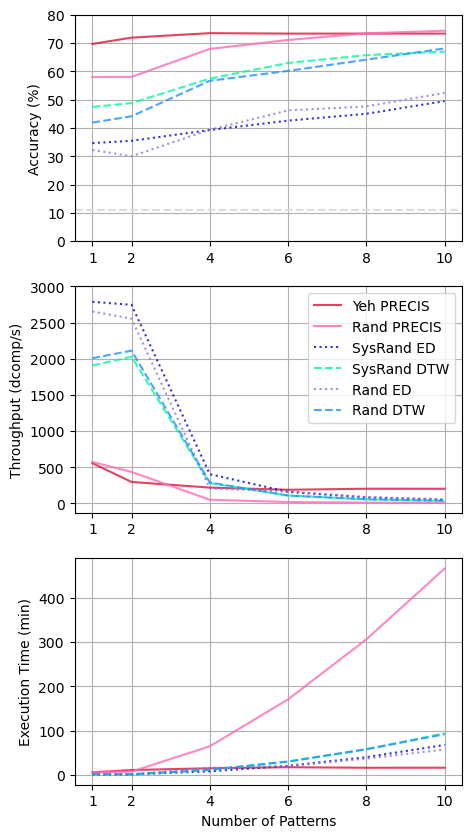

In [3]:
numpatvalues = np.unique(np.asarray(data['NUMPAT']))
accs, times = [], []
for numpat in numpatvalues: # on a numpat basis
    YEHPRECIS_numpat = np.squeeze(np.asarray(YEHPRECIS[YEHPRECIS['NUMPAT']==numpat]))
    SYSRANDED_numpat = np.squeeze(np.asarray(SYSRANDED[SYSRANDED['NUMPAT']==numpat]))
    SYSRANDDTW_numpat = np.squeeze(np.asarray(SYSRANDDTW[SYSRANDDTW['NUMPAT']==numpat]))
    RANDED_numpat = RANDED[RANDED['NUMPAT']==numpat]
    RANDDTW_numpat = RANDDTW[RANDDTW['NUMPAT']==numpat]
    RANDPRECIS_numpat = RANDPRECIS[RANDPRECIS['NUMPAT']==numpat]

    randed_avgtime, randdtw_avgtime, randprecis_avgtime = [], [], []
    randed_avgaccs, randdtw_avgaccs, randprecis_avgaccs = [], [], []
    
    
    # put time elapesed into its own list
    randed_times = np.asarray(RANDED_numpat['ENDTIME-STARTTIME'])
    randdtw_times = np.asarray(RANDDTW_numpat['ENDTIME-STARTTIME'])
    randprecis_times = np.asarray(RANDPRECIS_numpat['ENDTIME-STARTTIME'])
    # put accs into its own list
    randed_accs = np.asarray(RANDED_numpat['ACCRATE'])
    randdtw_accs = np.asarray(RANDDTW_numpat['ACCRATE'])
    randprecis_accs = np.asarray(RANDPRECIS_numpat['ACCRATE'])
    ic(numpat, len(randed_times), len(randdtw_times), len(randprecis_times))

    accs_numpat = np.array([YEHPRECIS_numpat[-1], np.mean(randprecis_accs), np.mean(randed_accs), np.mean(randdtw_accs), SYSRANDED_numpat[-1], SYSRANDDTW_numpat[-1]])*100
    time_numpat = np.array([YEHPRECIS_numpat[-2], np.mean(randprecis_times), np.mean(randed_times), np.mean(randdtw_times), SYSRANDED_numpat[-2], SYSRANDDTW_numpat[-2]])

    accs.append(accs_numpat)
    times.append(time_numpat)

fig, axs = plt.subplots(3, figsize=(5,10))
labels = {0: "Yeh PRECIS", 1:"Rand PRECIS", 2: "SysRand ED", 3: "SysRand DTW", 4: "Rand ED", 5: "Rand DTW"} # 
linestyles = {0:"solid",1: "solid", 2:"dotted",3:"dashed",4:"dotted",5:"dashed"}
markers={0:"s", 1:"s", 2:"o", 3:"s", 4:"o"}
colors = {0:"crimson",1: "hotpink", 2:"mediumblue",3:"mediumspringgreen",4:"mediumpurple",5:"dodgerblue"}
xticks = np.array([1,2,4,6,8,10])
accs = np.array(accs).transpose()
times = np.array(times).transpose()
setyticks_acc,setyticks_throughput=[],[]
for i in range(len(accs)):
    j = len(accs[i])
    print(type(xticks[:j]), type(accs[i]))
    axs[0].plot(xticks[:j],accs[i], label=labels[i],alpha=0.8,linestyle=linestyles[i],c=colors[i]) #,marker=markers[i])
    axs[1].plot(xticks[:j],198135/times[i], label=labels[i],alpha=0.8,linestyle=linestyles[i],c=colors[i]) #,marker=markers[i])
    axs[2].plot(xticks[:j],times[i]/60, label=labels[i],alpha=0.8,linestyle=linestyles[i],c=colors[i]) #,marker=markers[i])

axs[0].axhline(y=(70/630)*100,linestyle="dashed",c='gainsboro',label="Default Rate")
for i in range(3):
    axs[i].grid()
    axs[i].set_xticks(ticks=[1,2,4,6,8,10])

axs[0].set_ylim([0,75])
# axs[1].set_ylim([0,95])
# axs[1].set_yscale('log')
axs[1].legend()
axs[2].set_xlabel("Number of Patterns")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_yticks(ticks=[0,10,20,30,40,50,60,70,80])
axs[1].set_ylabel("Throughput (dcomp/s)")
axs[2].set_ylabel("Execution Time (min)")
axs[1].set_yticks(ticks=[i*100 for i in range(0,31,5)])
# plt.savefig("DictSizeEval"+".svg", fmt='svg')
plt.show()